https://chat.openai.com/share/60e33599-7abe-4e87-9b5d-d718a9ce992e

Tokenization
(문장을 smaller part로 쪼개거나 punctuation marks를 제외시키는 기법)

In [1]:
import nltk

nltk.download('punkt')

nltk.download('stopwords')

nltk.download('wordnet')

nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\XOTOURLLIFE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\XOTOURLLIFE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\XOTOURLLIFE\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\XOTOURLLIFE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [2]:
# sentence로 tokenize
from nltk.tokenize import sent_tokenize

paragraph = '''Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world'''

tokenized_sentences = sent_tokenize(paragraph)
print(tokenized_sentences)

['Taj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world']


In [3]:
# word로 tokenize
from nltk.tokenize import word_tokenize

tokenized_words = word_tokenize(paragraph)
print(tokenized_words)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world']


In [4]:
# 구두점도 tokenize
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenized_everything = tokenizer.tokenize(paragraph)
print(tokenized_everything)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world']


In [9]:
from nltk.corpus import stopwords

stopwords_set = set(stopwords.words("english"))
print(stopwords_set)

{'their', 'and', 'they', 'needn', 'some', 'ma', 'weren', 'them', 'own', 'mustn', 'off', "needn't", 'down', 'under', 'y', "wouldn't", 'into', 'to', 'on', 'themselves', 'where', "you'd", 'it', "hasn't", "couldn't", 'yourself', 'few', 'above', 'couldn', 'as', "mustn't", "weren't", 'its', "you've", 'being', 'how', 'don', 'that', 'hasn', "aren't", "mightn't", 'ain', 'shouldn', 'will', 'has', 'doing', 'yourselves', 'him', 'more', 'a', 'mightn', 'same', 'you', 'both', 'isn', 'shan', "it's", 't', 'does', 'from', 'can', 'are', 'this', "she's", 'our', 'very', 'too', 'your', 'had', 'between', 'during', "doesn't", 'do', 'm', 'up', "shouldn't", 'herself', 'because', 'most', 're', 'an', 'did', 'he', 'through', 'just', "that'll", 'over', 'there', 'o', 'doesn', 'we', 'hers', 'by', 'have', 'her', 'd', 'then', 'or', 'in', 'why', 'out', 'here', 'when', "you're", 'again', 'further', 'ours', 'nor', 'of', 'am', "haven't", 'any', 'didn', 'before', 'so', "hadn't", 'is', 'itself', "you'll", 'she', 'now', 'hadn

In [11]:
# stopwords 불용어 처리하는 법
filter_word_list = []

for word in tokenized_words:
    if word in stopwords_set:
        continue
    else:
        filter_word_list.append(word)
    
print("Tokenized word list:", tokenized_words)
print("Filtered word list:", filter_word_list)

Tokenized word list: ['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world']
Filtered word list: ['Taj', 'Mahal', 'one', 'beautiful', 'monuments', '.', 'It', 'one', 'wonders', 'world']


Stemming
(단어의 어간 찾기! ex, Consultant -> Consult)

Lemmatization (Stemming이랑 비슷하나 본래 단어의 의미를 찾아줌! ex, geese -> goose)

In [21]:
# nltk에서 stemming and Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

sample_word = "drunken"

print("Lemmatized sample Word: ", lemmatizer.lemmatize(sample_word, "v"))
print("Stemmed Sample Word:", stemmer.stem(sample_word))

Lemmatized sample Word:  drunken
Stemmed Sample Word: drunken


In [27]:
import spacy

nlp = spacy.load("en_core_web_sm")

words = nlp("cry cries crying cried")

for w in words:
    print('Original word: ', w.text)
    print('Lemmatized word: ', w.lemma_)
    print('what is this?:', w.pos_)

Original word:  cry
Lemmatized word:  cry
what is this?: NOUN
Original word:  cries
Lemmatized word:  cry
what is this?: NOUN
Original word:  crying
Lemmatized word:  cry
what is this?: VERB
Original word:  cried
Lemmatized word:  cry
what is this?: VERB


In [28]:
# POS 검사
from nltk.tokenize import word_tokenize
from nltk import pos_tag

sentence = "Taj Mahal is one of the beautiful monument."

sent_tokens = word_tokenize(sentence)
sent_pos = pos_tag(sent_tokens)
print(sent_pos)

[('Taj', 'NNP'), ('Mahal', 'NNP'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('beautiful', 'JJ'), ('monument', 'NN'), ('.', '.')]


In [29]:
# Entity 검사
docs = nlp(paragraph)
entities = [(i.text, i.label_) for i in docs.ents]
print(entities)

[('Taj Mahal', 'PERSON')]


In [31]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)

fdist.most_common(5)


<FreqDist with 12 samples and 18 outcomes>


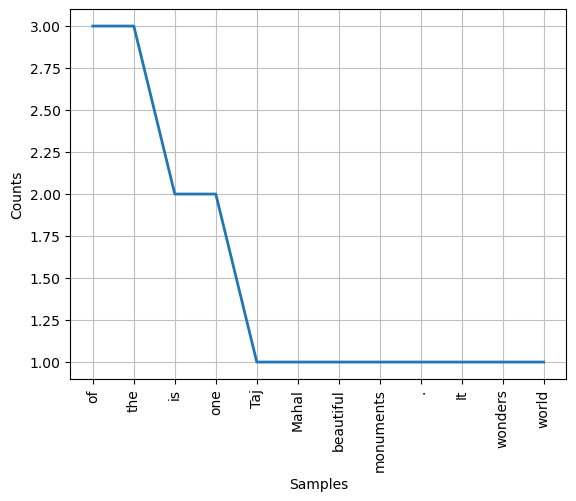

In [34]:
import matplotlib.pyplot as plt

fdist.plot(20, cumulative=False)
plt.show()

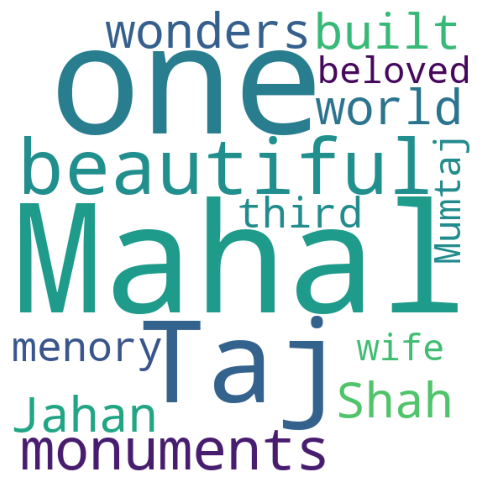

In [36]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

stopword_list = set(STOPWORDS)
paragraph = '''Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in menory of his third beloved wife Mumtaj Mahal'''

word_cloud = WordCloud(width = 550, height = 550,
                       background_color = 'white',
                       stopwords = stopword_list,
                       min_font_size = 10).generate(paragraph)

plt.figure(figsize=(8, 6))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

{'their', 'and', 'they', 'some', 'them', 'hence', 'own', 'off', 'down', 'however', 'under', "wouldn't", 'into', 'to', 'else', 'cannot', 'on', 'themselves', "i'd", 'where', 'since', 'also', "can't", "hasn't", 'it', "couldn't", "you'd", 'yourself', 'few', 'above', 'as', "mustn't", "i've", 'get', "weren't", 'its', "you've", 'being', 'how', 'ever', 'that', "aren't", 'doing', 'has', 'more', 'him', 'yourselves', 'a', 'same', 'both', 'you', "it's", 'from', 'does', 'can', 'are', "she'll", 'would', 'this', "she's", 'our', 'very', "how's", 'too', 'your', 'between', 'had', 'http', 'like', 'during', "doesn't", 'do', 'up', "shouldn't", 'herself', 'because', "he'll", 'most', 'an', 'did', 'he', "we'd", 'through', 'just', 'over', 'there', "what's", 'we', 'hers', 'by', 'k', "they'd", 'have', 'her', 'then', 'or', 'in', 'shall', 'why', 'out', 'therefore', 'here', 'when', 'r', "you're", 'again', 'further', 'nor', 'ours', 'of', 'am', 'ought', "haven't", "why's", 'any', "that's", 'before', 'so', "hadn't", '